<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [65]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# import tree classifier and regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


## Imports for Splitting Data and Building Pipeline


In [67]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [69]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [70]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [71]:
# load banknote authentication into df
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA/MLA4/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

Not needed

### Splitting Data into Train/Test

In [72]:
# split into X and y with x dropping date and forgery and y only forgery
X = df.drop('forgery',axis=1)
y = df['forgery']

In [73]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [74]:
numerical_features = X.select_dtypes(include=['number']).columns

In [75]:
# Create column transformer to minmax scale the columns
# Create a column trasformer to MinMax Scale
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Create preprocessor for data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

In [76]:
# Create pipeline to fit the decision tree classification
dt_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', DecisionTreeClassifier())])

### Executing the Model

In [77]:
# fit the model
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

### Evaluating Model

Precision: 0.992
Recall: 0.945
F1 Score: 0.968


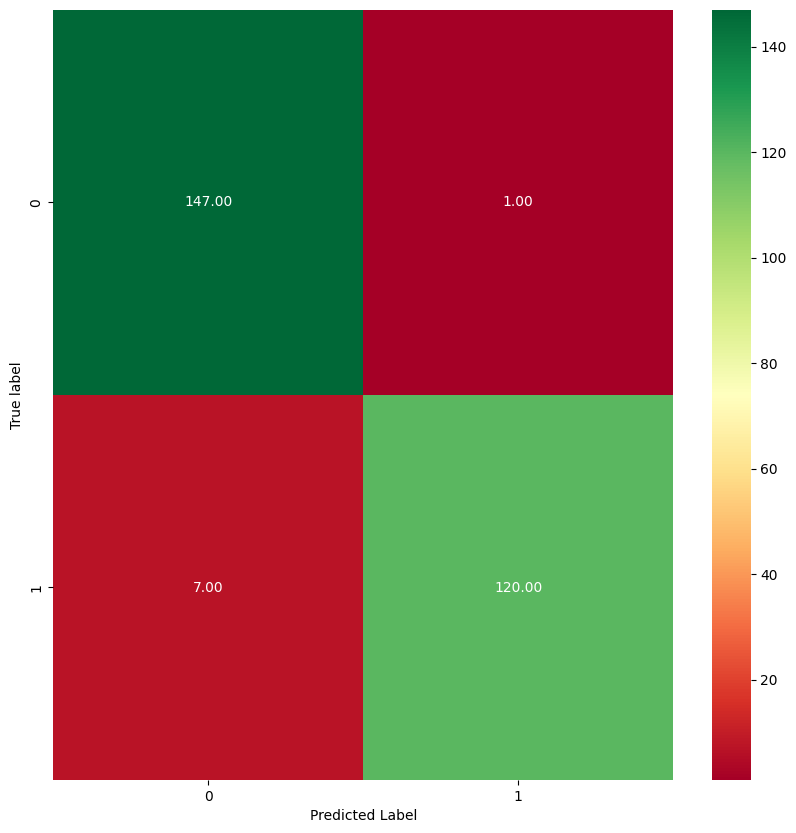

In [78]:
# plot cm and calculate precision, recall, and f1 score
y_pred = dt_pipe.predict(X_test)
plot_cm(y_test, y_pred)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))


The precision score means that this model is amazing at predicting true positives. The accuracy score also suggests that the model is great at predicting positive values. The f1 score suggests that the model is very good and balanced at predicting true instances.

### Conclusion

This model performs very well with high recall, precision, and f1 scores meaning that it is very good at predicting true positives and true negatives. It is a very good model for predicting forgeries.

## Problem 2

### Reading the Data

In [79]:
# read steel industry into df
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA/MLA4/Steel_industry_data.csv')

In [80]:
# Rename columns according to table
df.rename(columns = {'Usage_kWh': 'usage_kwg', 'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh', 'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh', 'Lagging_Current_Power_Factor':'lag_current_pwr', 'Leading_Current_Power_Factor':'lead_current_pwr', 'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'}, inplace=True)
df.head()

,date,usage_kwg,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Splitting Data into Train/Test

In [81]:
# split into X that drops date and usage_kwh and y that drops
X = df.drop(['date', 'usage_kwg'], axis=1)
y = df['usage_kwg']

In [82]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [83]:
# Splitting features into numerical and categorical
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [84]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [85]:
# Create pipeline for DecisionTreeRegression
dtr_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', DecisionTreeRegressor())])

### Executing the Model

In [86]:
dtr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor())])

### Evaluating Model

In [87]:
# Predict on test set
y_pred = dtr_pipe.predict(X_test)

# RMSE for test and train
rmse_test = root_mean_squared_error(y_test, y_pred)
rmse_train = root_mean_squared_error(y_train, dtr_pipe.predict(X_train))

# Printing
print(f"Root Mean Squared Error Test: {rmse_test:.4f}")
print(f"Root Mean Squared Error Train: {rmse_train:.4f}")

Root Mean Squared Error Test: 1.4162
Root Mean Squared Error Train: 0.0000


The root mean squared error for test is fairly low as compared to the other models so it is an okay model. The RMSE for train is 0 which means that is perfect which likely means that it is overfitted or there is some issue.

### Conclusion
This model is okay at predicting kwh usage as its RMSE is still a little bit high, but it is significantly better than the other models we have tested on this dataset. The predictions of the model will likely be within 1.36 of the actual value which is not awful, but it leaves much to be desired.